[ENGIE’s first open data windfarm](https://opendata-renewables.engie.com/)

[La Haute Borne Data (2017-2020)](https://opendata-renewables.engie.com/explore/dataset/01c55756-5cd6-4f60-9f63-2d771bb25a1a/table)

[Data Descriptions](https://opendata-renewables.engie.com/explore/dataset/39490fd2-04a2-4622-9042-ce4dd34c2a58/information)

Article:
    [Guidelines for a preliminary windfarm data-driven analysis](https://medium.com/@mbonanomi/guidelines-for-a-preliminary-windfarm-data-driven-analysis-f4793f840ef2)

# Pickle & Unpickle windfarm

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import string
import datetime
import warnings
import os


# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from windrose import WindroseAxes
import matplotlib.cm as cm
%matplotlib inline

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Analysis Tools
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import make_scorer,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent fu

In [2]:
windfarm2016 = pd.read_pickle("./windfarm2016.pkl")
windfarm2016

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
13872,R80736,2016-11-26T20:30:00+01:00,2016-11-26,19:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.040001,16.000000,17.00,0.15,4.21000,4.130000,4.28000,0.030000,25.370001,24.980000,25.680000,0.120000,-0.150000,-0.440000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.440000,0.080000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.889999,19.700001,19.900000,0.04,16.830000,16.799999,17.000000,0.06,21.549999,21.400000,21.600000,0.08,26.100000,26.000000,26.100000,0.01,26.700001,26.700001,26.799999,0.01,25.420000,24.799999,25.600000,0.22,29.200001,29.100000,29.299999,0.01,234.030000,234.030000,234.030000,0.00,15.990000,15.800000,16.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,133.670000,123.090000,143.130000,5.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.37,-110.940000,-90.900002,5.510000,9.00,8.8,9.05,0.02,50.000000,49.959999,50.029999,0.01,695.89001,694.01001,698.37000,0.81,0.000000,0.000000,0.00,0.00,17.299999,17.299999,17.400000,0.01,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,133.670000,NaN,NaN,NaN,133.670000,NaN,NaN,NaN
13875,R80736,2016-11-26T22:30:00+01:00,2016-11-26,21:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.000000,16.000000,16.00,0.00,4.07000,4.030000,4.10000,0.010000,24.190001,23.980000,24.360001,0.060000,-0.130000,-0.430000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000,0.430000,0.070000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.260000,19.100000,19.299999,0.07,16.200001,16.100000,16.200001,0.00,20.500000,20.400000,20.500000,0.01,25.299999,25.250000,25.500000,0.02,25.900000,25.850000,25.900000,0.01,24.570000,24.250000,24.799999,0.08,28.190001,28.100000,28.200001,0.02,234.030000,234.030000,234.030000,0.00,15.830000,15.800000,16.000000,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,150.060000,123.090000,205.460010,25.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.00,-110.930000,-28.559999,25.150000,8.66,8.5,8.75,0.07,50.020000,49.990002,50.040001,0.01,696.19000,693.65002,698.51001,1.47,0.000000,0.000000,0.00,0.00,17.000000,16.950001,17.000000,0.00,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,150.060000,NaN,NaN,NaN,150.060000,NaN,NaN,NaN
13878,R80736,2016-11-30T00:40:00+01:00,2016-11-29,23:40:00,2016,11,45.000000,45.000000,45.000000,0.00,9.000000,9.000000,9.94,0.05,94.43000,73.129997,107.93000,8.530000,28.719999,28.450001,28.969999,0.080000,-1.310000,-1.780000,-0.930000,0.140000,0.000000,0.000000,0.090000,0.000000,1.310000,0.930000,1.780000,0.140000,1.00,1.00,1.00,0.00,90.470001,68.980003,104.04000,8.520001,41.369999,41.200001,41.599998,0.12,35.139999,34.900002,35.500000,0.14,54.889999,54.599998,55.400002,0.21,46.560001,46.400002,46.599998,0.07,47.500000,47.299999,47.700001,0.14,47.549999,47.200001,47.900002,0.15,49.990002,49.799999,50.200001,0.10,81.459999,81.459999,81.459999,0.00,21.459999,2

In [3]:
windfarm = pd.read_pickle("./windfarm.pkl")
windfarm

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,2017-02-08,07:00:00,2017,2,44.990002,44.990002,44.990002,0.00,14.00,14.00,14.0,0.00,38.369999,17.6800,52.41000,9.390000,2.39,2.06,2.69,0.09,-1.89000,-2.36000,-1.40000,0.150000,0.000000,0.000000,0.000000,0.00,1.89000,1.40000,2.36000,0.15,1.00,1.0,1.00,0.0,38.110001,17.27,51.919998,9.400000,33.410000,33.200001,33.599998,0.14,30.790001,30.600000,30.850000,0.03,45.590000,45.299999,45.799999,0.11,35.360001,35.099998,35.599998,0.15,37.939999,37.799999,38.000000,0.08,34.130001,31.799999,35.700001,1.04,39.580002,39.049999,40.200001,0.40,318.12000,318.12000,318.12000,0.00,20.610001,20.500000,20.799999,0.08,0.14,0.00,1.94,0.44,0.22,0.00,1.93,0.53,0.18,0.00,1.89,0.44,358.049990,298.76999,54.560001,12.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.939999,-19.350000,96.449997,12.05,4.80,4.8,4.90,0.01,50.000000,49.959999,50.029999,0.01,698.40002,696.01001,708.03003,2.40,0.33,0.00,0.49,0.16,19.020000,19.0,19.100000,0.04,-18.889999,-438.32999,0.00000,79.82000,NaN,NaN,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,2017-01-26,01:40:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1204.140000,1195.8101,1208.66000,3.260000,1796.71,1764.35,1816.86,10.58,197.32001,186.07001,200.96001,2.150000,22.200001,16.120001,25.110001,1.04,198.58000,186.92999,202.14999,2.17,0.99,1.0,0.99,0.0,1205.520000,1197.17,1210.060100,3.250000,40.639999,40.200001,41.099998,0.17,29.379999,29.150000,29.600000,0.08,54.580002,53.500000,55.799999,0.37,64.800003,64.550003,65.000000,0.08,64.400002,64.300003,64.599998,0.08,54.959999,54.700001,55.599998,0.12,56.209999,56.000000,56.450001,0.07,63.48000,63.48000,63.48000,0.00,21.900000,21.700001,22.200001,0.13,4.33,3.42,5.54,0.39,5.38,3.74,6.69,0.46,4.85,3.67,6.01,0.39,74.470001,9.47000,108.520000,9.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,-54.009998,45.029999,9.74,-7.16,-7.3,-6.90,0.11,50.009998,49.980000,50.029999,0.01,704.65997,703.42999,705.90002,0.45,11.48,11.37,11.54,0.03,21.610001,21.6,21.799999,0.03,1562.970000,1481.31010,1586.53000,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,2017-01-26,12:50:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1179.860000,1060.6200,1287.86000,49.009998,1662.15,1251.04,2029.50,164.30,176.45000,108.74000,245.96001,29.559999,18.620001,11.780000,24.469999,2.48,177.53000,110.14000,246.80000,29.35,0.99,1.0,0.98,0.0,1181.700000,1062.28,1289.950000,49.110001,49.509998,48.849998,50.099998,0.21,37.349998,37.000000,37.700001,0.13,63.990002,62.599998,65.500000,0.56,66.800003,66.099998,67.349998,0.27,66.290001,65.750000,66.900002,0.34,56.830002,56.450001,57.150002,0.11,58.570000,58.299999,59.049999,0.09,70.07000,70.07000,70.07000,0.00,27.410000,27.299999,27.700001,0.11,4.89,3.64,6.39,0.52,5.19,3.65,6.69,0.52,5.04,3.70,6.38,0.48,73.949997,328.78000,122.340000,13.83,NaN,NaN,NaN,NaN

In [4]:
# Append 2 dfs
windfarm = windfarm2016.append(windfarm)

In [5]:
windfarm

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
13872,R80736,2016-11-26T20:30:00+01:00,2016-11-26,19:30:00,2016,11,90.00,90.00,90.00,0.00,16.040001,16.00,17.00,0.15,4.21000,4.130000,4.28000,0.03,25.370001,24.980000,25.680000,0.120000,-0.15,-0.440000,0.000000,0.080000,0.000000,0.00,0.000000,0.00,0.15,0.000000,0.440000,0.08,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.889999,19.700001,19.900000,0.04,16.830000,16.799999,17.000000,0.06,21.549999,21.400000,21.600000,0.08,26.100000,26.000000,26.100000,0.01,26.700001,26.700001,26.799999,0.01,25.420000,24.799999,25.600000,0.22,29.200001,29.100000,29.299999,0.01,234.030000,234.030000,234.030000,0.00,15.990000,15.800000,16.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,133.67,123.09,143.13000,5.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.37,-110.940000,-90.900002,5.51,9.00,8.8,9.05,0.02,50.00,49.959999,50.029999,0.01,695.89001,694.01001,698.37000,0.81,0.000000,0.00,0.00,0.00,17.299999,17.299999,17.400000,0.01,0.00000,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,133.67,NaN,NaN,NaN,133.67,NaN,NaN,NaN
13875,R80736,2016-11-26T22:30:00+01:00,2016-11-26,21:30:00,2016,11,90.00,90.00,90.00,0.00,16.000000,16.00,16.00,0.00,4.07000,4.030000,4.10000,0.01,24.190001,23.980000,24.360001,0.060000,-0.13,-0.430000,0.000000,0.070000,0.000000,0.00,0.000000,0.00,0.13,0.000000,0.430000,0.07,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.260000,19.100000,19.299999,0.07,16.200001,16.100000,16.200001,0.00,20.500000,20.400000,20.500000,0.01,25.299999,25.250000,25.500000,0.02,25.900000,25.850000,25.900000,0.01,24.570000,24.250000,24.799999,0.08,28.190001,28.100000,28.200001,0.02,234.030000,234.030000,234.030000,0.00,15.830000,15.800000,16.000000,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150.06,123.09,205.46001,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.00,-110.930000,-28.559999,25.15,8.66,8.5,8.75,0.07,50.02,49.990002,50.040001,0.01,696.19000,693.65002,698.51001,1.47,0.000000,0.00,0.00,0.00,17.000000,16.950001,17.000000,0.00,0.00000,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,150.06,NaN,NaN,NaN,150.06,NaN,NaN,NaN
13878,R80736,2016-11-30T00:40:00+01:00,2016-11-29,23:40:00,2016,11,45.00,45.00,45.00,0.00,9.000000,9.00,9.94,0.05,94.43000,73.129997,107.93000,8.53,28.719999,28.450001,28.969999,0.080000,-1.31,-1.780000,-0.930000,0.140000,0.000000,0.00,0.090000,0.00,1.31,0.930000,1.780000,0.14,1.00,1.00,1.00,0.00,90.470001,68.980003,104.04000,8.520001,41.369999,41.200001,41.599998,0.12,35.139999,34.900002,35.500000,0.14,54.889999,54.599998,55.400002,0.21,46.560001,46.400002,46.599998,0.07,47.500000,47.299999,47.700001,0.14,47.549999,47.200001,47.900002,0.15,49.990002,49.799999,50.200001,0.10,81.459999,81.459999,81.459999,0.00,21.459999,21.200001,21.600000,0.06,0.34,0.00,1.96,0.68,2.32,1.73,2.76,0.22,1.33,0.86,2.36,0.39,125.34,106.24,141.37000,5.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.91,24.780001,59.910000,5.32,0.07,-0.1,0.20,0.11,49.98,

In [6]:
windfarm.describe()

,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
count,428380.000000,428380.000000,425150.000000,425150.000000,425150.000000,425150.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425444.000000,425444.000000,425444.000000,425444.000000,421994.000000,421994.000000,421994.000000,421994.000000,425151.000000,425151.000000,425151.000000,425151.000000,425153.000000,425153.000000,425153.000000,425153.000000,424075.000000,424075.000000,424075.000000,424075.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425444.000000,425444.000000,425444.000000,425444.000000,425153.000000,425153.000000,425153.000000,425153.000000,424165.000000,424165.000000,424165.000000,424165.000000,424201.000000,424201.000000,424201.000000,424201.000000,425444.000000,425444.000000,425444.000000,425444.000000,425444.000000,425444.000000,425444.000000,425444.000000,138507.000000,138507.000000,138507.000000,138507.000000,138507.000000,138507.000000,138507.000000,138507.000000,286646.000000,286646.000000,286646.000000,286646.000000,425153.000000,425153.000000,425153.000000,425153.000000,425151.000000,425151.000000,425151.000000,425151.000000,425151.000000,425151.000000,425151.000000,425151.000000,422526.000000,422526.000000,422526.000000,422526.000000,425153.000000,425153.000000,425153.000000,425153.000000,421812.000000,421812.000000,421812.000000,421812.000000,0.0,0.0,0.0,0.0,243421.000000,0.0,0.0,0.0,243421.000000,0.0,0.0,0.0
mean,2016.523965,6.429721,11.011174,9.852034,12.606383,0.920133,19.428812,19.248367,19.633239,0.097904,1089.888937,974.230060,1199.816160,61.227954,2190.539472,1384.200425,3107.797861,407.585726,346.777191,191.533046,528.782051,79.277376,26.308366,13.400480,38.707291,5.098577,350.092202,197.846499,531.656193,78.699007,0.991878,0.736685,0.962451,0.006635,1093.604709,977.311586,1204.205425,61.552043,39.665214,38.786453,40.553767,0.393549,35.900146,35.397407,36.409917,0.238412,56.070613,54.513920,57.679417,0.570108,60.295632,59.509751,61.044715,0.404551,60.954222,60.252279,61.629185,0.393031,50.908503,49.867771,51.937539,0.523596,54.146561,53.706247,54.564716,0.189519,186.848167,186.191568,187.667827,1.386730,24.834307,24.082320,25.587956,0.446773,5.402663,3.435615,7.626150,0.793610,5.378500,3.473216,7.564367,0.769205,5.377080,3.529513,7.483306,0.750693,185.076892,176.596237,204.390616,27.692554,0.636745,-44.094266,50.603486,29.831893,0.636745,-44.094266,50.603486,29.831893,1.175315,-43.753929,50.709906,27.180176,12.147938,11.952804,12.345245,0.102142,49.981684,49.948897,50.014079,0.01596

In [7]:
windfarm['Date_time'] = pd.to_datetime(windfarm.Date_time, utc=True)

## Observations (averages):

**Angle**:
- Pitch_angle average is 12 degrees
- Nacelle_angle 189 degrees
- Nacelle_angle_corrected 173 degrees
- Vane_position_1 0.6 degrees:
    - First wind vane on the nacelle
- Vane_position_2 0.6 degrees:
    - Second wind vane on the nacelle
- Vane_position 2.2 degrees

**Speed/Torque**:
- Generator_converter_speed average 1088 rpm
- Generator_speed 1094 rpm
- Converter_torque average 2252 Nanometers (Nm)
- Rotor_speed 10.5 rpm
- Torque 2142 Nm

**Temperature**:
- *Outdoor_temperature 12.2*C (~54*F)*


- Hub_temperature average is 19*C (~66*F)
- Generator_bearing_1_temperature 39*C (~102*F)
- Generator_bearing_2_temperature 36*C (~97*F)
- Generator_stator_temperature 55*C (~131*F)
- Gearbox_bearing_1_temperature 60*C (~140*F)
- Gearbox_bearing_2_temperature 60*C (~140*F)
- Gearbox_inlet_temperature 50*C (~122*F)
- Gearbox_oil_sump_temperature 54*C (~129*F)
- Nacelle_temperature 25*C (~77*F)
- Rotor_bearing_temperature	27.5*C (~82*F)

**Electricity/Power**:
- *Active_power average 360 kW*


- Reactive_power average 27 kVAr
- Apparent_power average 363 kVA: 
    - Should be the square root of the sum of P square and Q square
    - This is about right ^
- Power_factor average ~1:
    - Should equal P/S
    - This ^ is about right too
- Grid_frequency 50 Hz
- Grid_voltage 701 V

**Wind**:
- Wind_speed_1 5.5 m/s:	
    - First anemometer on the nacelle
- Wind_speed_2 5.4 m/s:
    - Second anemometer on the nacelle
- Wind_speed 5.4 m/s:
    - Average wind speed
- Absolute_wind_direction 187 degrees
- Absolute_wind_direction_corrected 173 degrees

# Wind Turbine Performance Estimation

Two Ways Wind Turbine Generator Performance Estimation are Considered:

1. **Power Output** calculation (on a mothly basis for an annual comparison)
2. *Capacity Factor* estimation, so that we can compare this specific turbine with other turbines or power production technologies using a dimensionless parameter.

## Break windfarm df into 4 dfs (1 per turbine)

In [8]:
windfarm.Wind_turbine_name.value_counts()

R80736    107131
R80711    107131
R80721    107131
R80790    106987
Name: Wind_turbine_name, dtype: int64

In [9]:
wf_R80721 = windfarm[windfarm['Wind_turbine_name']== 'R80721'].reset_index()

In [10]:
wf_R80721 = wf_R80721.drop(columns=['index'])

In [11]:
wf_R80711 = windfarm[windfarm['Wind_turbine_name']== 'R80711'].reset_index()

In [12]:
wf_R80711 = wf_R80711.drop(columns=['index'])

In [13]:
wf_R80736 = windfarm[windfarm['Wind_turbine_name']== 'R80736'].reset_index()

In [14]:
wf_R80736 = wf_R80736.drop(columns=['index'])

In [15]:
wf_R80790 = windfarm[windfarm['Wind_turbine_name']== 'R80790'].reset_index()

In [16]:
wf_R80790 = wf_R80790.drop(columns=['index'])

## Power Output Calculation for each turbine

In [17]:
# Convert kW to MWh
wf_R80721['E_avg'] = wf_R80721['P_avg'] / 6000 

In [18]:
wf_R80721_df_energy = pd.DataFrame(wf_R80721.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [19]:
wf_R80721_df_energy.reset_index(inplace=True)

In [20]:
# Convert kW to MWh
wf_R80711['E_avg'] = wf_R80711['P_avg'] / 6000 

In [21]:
wf_R80711_df_energy = pd.DataFrame(wf_R80711.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [22]:
wf_R80711_df_energy.reset_index(inplace=True)

In [23]:
# Convert kW to MWh
wf_R80736['E_avg'] = wf_R80736['P_avg'] / 6000 

In [24]:
wf_R80736_df_energy = pd.DataFrame(wf_R80736.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [25]:
wf_R80736_df_energy.reset_index(inplace=True)

In [26]:
# Convert kW to MWh
wf_R80790['E_avg'] = wf_R80790['P_avg'] / 6000 

In [27]:
wf_R80790_df_energy = pd.DataFrame(wf_R80790.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [28]:
wf_R80790_df_energy.reset_index(inplace=True)

## Power Output Calculation Overall

In [29]:
# Convert kW to MWh
windfarm['E_avg'] = windfarm['P_avg'] / 6000 

In [30]:
df_energy = pd.DataFrame(windfarm.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [31]:
df_energy.reset_index(inplace=True)

## Capacity Factory Estimation

Capacity Factor is a design parameter. In absolute value, it does not give us information about Wind Turbine Generator performance. It is computed as the ratio between real power output and nominal rated power It must be above 0 kW and below the maximum rated power (in this example 2050kW):

In [32]:
windfarm.P_avg.max()

2051.1201

$CF = \frac{P_{real}}{P_{rated}}$

For a wind turbine generator, the usual CF ranges between 20% and 40%, depending on several design choices made by the manufactures and plant owner:

1. Number of  Wind Turbine Generator installed in the farm
2. Wind availability and annual distribution for that specific location
3.  Wind Turbine Generator technology

Nevertheless, CF can be a good indicator of  Wind Turbine Generator performance as a relative comparison. For instance, one can:

1. Compare  Wind Turbine Generators in the very same farm and with the same technical specs and assess the impact of wake effects
2. Compare data from the very same  Wind Turbine Generator (as we are gonna do in a while) and look at the difference between different years of months

In [33]:
P_nom = 2050 # kW | nominal power
wf_R80711['Cf_avg'] = wf_R80711['P_avg']/P_nom # from kW to CF
wf_R80711_df_cf = pd.DataFrame(wf_R80711.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
wf_R80711_df_cf.reset_index(inplace=True)

In [34]:
wf_R80721['Cf_avg'] = wf_R80721['P_avg']/P_nom # from kW to CF
wf_R80721_df_cf = pd.DataFrame(wf_R80721.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
wf_R80721_df_cf.reset_index(inplace=True)

In [35]:
wf_R80736['Cf_avg'] = wf_R80736['P_avg']/P_nom # from kW to CF
wf_R80736_df_cf = pd.DataFrame(wf_R80736.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
wf_R80736_df_cf.reset_index(inplace=True)

In [36]:
wf_R80790['Cf_avg'] = wf_R80790['P_avg']/P_nom # from kW to CF
wf_R80790_df_cf = pd.DataFrame(wf_R80790.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
wf_R80790_df_cf.reset_index(inplace=True)

In [37]:
windfarm['Cf_avg'] = windfarm['P_avg']/P_nom # from kW to CF
df_cf = pd.DataFrame(windfarm.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
df_cf.reset_index(inplace=True)

## Articles: 
- [guidelines-for-a-preliminary-windfarm-data-driven-analysis](https://medium.com/@mbonanomi/guidelines-for-a-preliminary-windfarm-data-driven-analysis-f4793f840ef2)
- [wondering-how-to-build-an-anomaly-detection-model](https://towardsdatascience.com/wondering-how-to-build-an-anomaly-detection-model-87d28e50309)
- [Outlier Book](http://www.charuaggarwal.net/outlierbook.pdf)
- [Introduction to Exploratory Data Analysis (EDA)](https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676)


# Dealing with Nulls

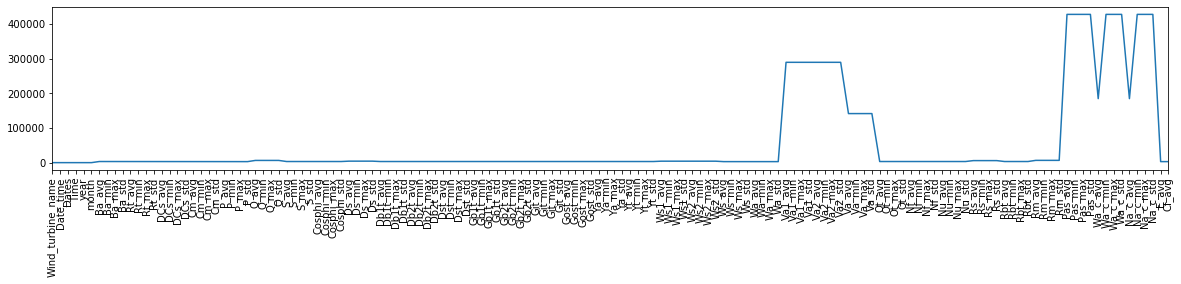

In [38]:
plt.figure(figsize=(20,3))
plt.plot(windfarm.isnull().sum(axis = 0))
plt.xticks(rotation=90)
plt.margins(x=0)
plt.show()

In [39]:
print('List of columns deleted because of NaN count exceeds maximum threshold:')
print(list(windfarm.loc[:,windfarm.isnull().sum(axis = 0) > 10000].columns))
df = windfarm.loc[:,windfarm.isnull().sum(axis = 0) < 10000]

List of columns deleted because of NaN count exceeds maximum threshold:
['Va1_avg', 'Va1_min', 'Va1_max', 'Va1_std', 'Va2_avg', 'Va2_min', 'Va2_max', 'Va2_std', 'Va_avg', 'Va_min', 'Va_max', 'Va_std', 'Pas_avg', 'Pas_min', 'Pas_max', 'Pas_std', 'Wa_c_avg', 'Wa_c_min', 'Wa_c_max', 'Wa_c_std', 'Na_c_avg', 'Na_c_min', 'Na_c_max', 'Na_c_std']


In [40]:
df.shape[0]

428380

In [41]:
df_no_na = df.dropna()
df_no_na.shape[0]

420149

In [42]:
windfarm = df_no_na

# Wind Turbine Generator (WTG) Performance Predictive Model

A first preliminary model is proposed in this Section.

1. Model Input: external metereological parameters such as Wind Speed, Wind Direction, Ambient Temperature. They are independent from wind turbine internal status.
2. Model Output: Predicted Power Output. Based on training history, our model predicts the expected power output in normal operating conditions.


Relevant assumptions:

1. Training Set historical data first 80% of data. The model assumes that data cleaning and pre-processing has filtered and deleted anomalies and extraordinary operating conditions.
2. Test Set Test set has undergone the very same data cleaning procedure, hence we expect to evaluate model performance from here. We will understard how good our model is when predicting normal WTG operating conditions.
3. Data Availability this model can be run both real-time or batch-like. If model performance in standard operating conditions are good, one can understand whether the turbine is behaving as expected or not, thanks to the observation of the delta between model predictions and real WTG data.

- USER-DEFINED FUNCTIONS (AND WHERE TO FIND THEM)
    - Two user-defined functions have been implemented:

1. Categorical data handling
2. Model training and test

Documentation:
- [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


In [43]:
def CatVarManagement(df,col_name):
    df_dummy = pd.get_dummies(df[col_name],prefix='M')
    df_new = pd.concat([df, df_dummy], axis=1)
    df_new = df_new.drop(col_name, axis = 1)
    return df_new

In [44]:
def RFTraining(df_train,df_test):
    # target feature to be predicted (average power output)
    label = 'P_avg'
    # feature/label separation for train data (2016-2018)
    X_train = df_train.drop(label,axis=1)
    y_train = df_train.loc[:,label]
    # feature/label separation for train data (2018)
    X_test = df_test.drop(label,axis=1)
    y_test = df_test.loc[:,label]
    # model definition and training
#     rfr = RandomForestRegressor(n_estimators=30, max_depth=30,verbose = 1)
    rfr = RandomForestRegressor(n_estimators=30, max_depth=30,verbose = 1,random_state=0)
    rfr.fit(X_train,y_train)
    # model prediction and performance metrics
    y_predict = rfr.predict(X_test)
    print_msg = 'Model Performance Metrics: \n MAE: {0} \n MSE: {1}'
    print(print_msg.format(mean_absolute_error(y_test,y_predict),mean_squared_error(y_test,y_predict))) 
    df_solutions = pd.DataFrame({'true' : np.array(y_test), 'predicted' : np.array(y_predict)})
    return rfr,df_solutions

# Feature Selection and Categorical Data

- Only features referred to WTG external (ambient) conditions are selected.

- Calendar feature Month is converted into categorical type

TRAIN TEST SPLIT

- Training set: first 80 % historical data

- Test set last 20% historical data

- When dealing with datatime datasets, it is important to split train and test set in a continuous way, without random shuffling. Otherwise the risk of overfitting becomes a real threat.

In [45]:
# windfarm['week']= windfarm['Date_time'].dt.week

In [46]:
features = ['Ws1_avg', 'Ws1_min', 'Ws1_max', 'Ws1_std', 
            'Ws2_avg', 'Ws2_min', 'Ws2_max', 'Ws2_std', 
            'Wa_avg', 'Wa_min', 'Wa_max', 'Wa_std',
            'Ot_avg', 'Ot_min', 'Ot_max', 'Ot_std','month','P_avg']

In [47]:
df_model = windfarm.copy()

In [48]:
df_train = df_model.loc[df_model['year']!=2018,features]
df_test = df_model.loc[df_model['year']==2018,features]
dt_test = pd.DataFrame(df_model.loc[df_model['year']==2018,'Date_time'])

In [49]:
# df_train = CatVarManagement(df_train,'month')
# df_test = CatVarManagement(df_test,'month')

# THE ACTUAL MODEL

RandomForestRegressor has several advantages:

- Easy to implement, very fast to train
- Able to handle correlated features
- Lower overfitting tendency compared to other methods (especially single decision tree)
- greatly implemented in scikit-learn
- Two error metrics are reported:

    1. Mean Absolute Error
    2. Mean Squared Error

Playing with model hyperparameters, one should minimize one (or both, in the optimal situation) error metric.

In [50]:
df_solutions = []
model, df_solutions = RFTraining(df_train, df_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Performance Metrics: 
 MAE: 47.83768751108837 
 MSE: 13251.224456132975


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


RandomForestRegressor(n_estimators=100, max_depth=15,verbose = 1)
- Model Performance Metrics: 
 - MAE: 47.176315969400235 
 - MSE: 12455.313103461098
 
RandomForestRegressor(n_estimators=30, max_depth=1,verbose = 1)
- Model Performance Metrics: 
 - MAE: 282.98773082031624 
 - MSE: 141324.57431429686
 
RandomForestRegressor(n_estimators=30, max_depth=100,verbose = 1)
- Model Performance Metrics: 
 - MAE: 47.30719906461992 
 - MSE: 12583.35648882212
 
**RandomForestRegressor(n_estimators=30, max_depth=30,verbose = 1)**
- Model Performance Metrics: 
 - MAE: 47.33231978878564 
 - MSE: 13130.845692353221

#### Comments:

Model performance is satisfactory. 

MAE gives us the idea of the average error we make if we assume that WTG power output is the one predicted by the model and not the one actually acquired by on-field sensors.

MAE about 47kW compared to a rated power of 2050kW is an acceptable value:

$\frac{MAE}{P_{rated}}=\frac{47}{2050}=2.3\%$

Anyway, this is maybe a too optimistic point of view, since our WTG seldom work at its maximum power. 

So we can recall what previously learned about average Capacity Factor during a whole year. 

Let's assume an average CF about 20-25%, which is a reasonable value if we check our CF analysis:

$\frac{MAE}{CF_{average} \cdot P_{rated}}=\frac{47}{0.2 \cdot 2050}=11.5\%$

$\frac{MAE}{CF_{average} \cdot P_{rated}}=\frac{47}{0.25 \cdot 2050}=9.2\%$

Our estimated percentage error is greater than the first (optimistic) 2.3%. 

Anyway, it is a solid result for this kind of application. 

Please remember that wind is a very unpredictable power source and wind power predictions based on wheater forecast are far way more uncertain, even applaying state-of-the-art machine learning techniques.

This preliminary windfarm analysis is an easy task compared to whether forecast-based predictions, so a good accuracy (like the one we obtained) was expected.

In [51]:
df_solutions =pd.concat([df_solutions.reset_index(drop=True),
           pd.Series(windfarm.loc[windfarm['year']==2018,'Date_time']).reset_index(drop=True)],axis=1)

# Visualize Results

In [52]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

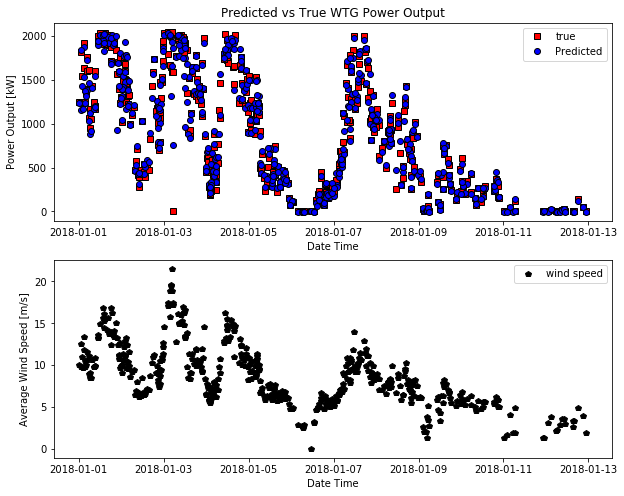

In [55]:
n = 500
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(211)
ax1.set_title('Predicted vs True WTG Power Output')
ax1.set_xlabel('Date Time')
ax1.set_ylabel('Power Output [kW]')
ax1 = plt.plot_date(df_solutions.loc[0:n,'Date_time'],df_solutions.loc[0:n,'true'],
                   markerfacecolor = 'red',markeredgecolor='black',marker='s', label='true')

ax2 = plt.plot_date(df_solutions.loc[0:n,'Date_time'],df_solutions.loc[0:n,'predicted'],
                   markerfacecolor = 'blue',markeredgecolor='black',marker='o', label='Predicted')

plt.legend(loc='upper right')


ax3 = fig.add_subplot(212)
ax3.set_xlabel('Date Time')
ax3.set_ylabel('Average Wind Speed [m/s]')
ax3 = plt.plot_date(dt_test.Date_time[0:n],df_test.reset_index().loc[0:(n-1),'Ws1_avg'],
                   markerfacecolor = 'black',markeredgecolor='black',marker='p', label='wind speed')

plt.legend(loc='upper right')

plt.show()

#### Comments

The first plot compares model predictions and real power output of 9 days in January 2018. There is a good agreement between model and reality. 

The second plot shows the most relevant feature for the model, which is the average wind speed over each 9 days.

#### Conclusions

This first approach to windfarm data analsis aimed at:

1. Understanding how to deal with real wind farm data, acquired by a SCADA system installed on each Wind Turbine Gemerator. Preprocessing is an essential step for every kind of model/analysis you want to build!
2. Estimating wind turbine performance from historical data, assessing average wind turbine capacity factor and observing season effects on power production
3. Studying wind intensity and direction distribution thanks to Python windrose library.
4. Building a preliminary machine learning model for wind power forecasting. It's practical use may be limited, yet it is interesting to see how to tune the model on our dataset and which model is convenient for a good trade-off between perfornace and computational power.